In [1]:
from modules.hopfield import HopfieldNetwork
from modules.dataset import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
from tqdm import tqdm


In [2]:
def MAPE(pre, gt):
    pre = np.array(pre)
    gt = np.array(gt)
    
    pre = pre+0.001
    gt = gt+0.001
    
    result = abs((gt - pre) / gt).mean()
    
    return round(result, 2)

Params
===

In [22]:
image_size = (16, 16)
image_path = 'images_same/*.*'
use_restriction = 3

Dataloaders
===

In [23]:
image_paths = glob.glob(pathname=image_path, recursive=True)
image_paths = image_paths[:len(image_paths)-use_restriction]

# Train data
dataset = Dataset(list_of_paths=image_paths, image_size=image_size)
flatten_images = dataset.get_all_flatten_images()

# Test data
test_dataset = Dataset(list_of_paths=image_paths, image_size=image_size, add_noise=0.3)

Model Initialization
===

In [24]:
model = HopfieldNetwork(train_data=flatten_images)
model.train()

100%|██████████| 2/2 [00:00<00:00, 1944.06it/s, Training...]


In [25]:
test_im_num = len(test_dataset)
print(test_im_num)

2


Evalution
===

100%|██████████| 1/1 [00:00<00:00, 480.89it/s, Predicting...]


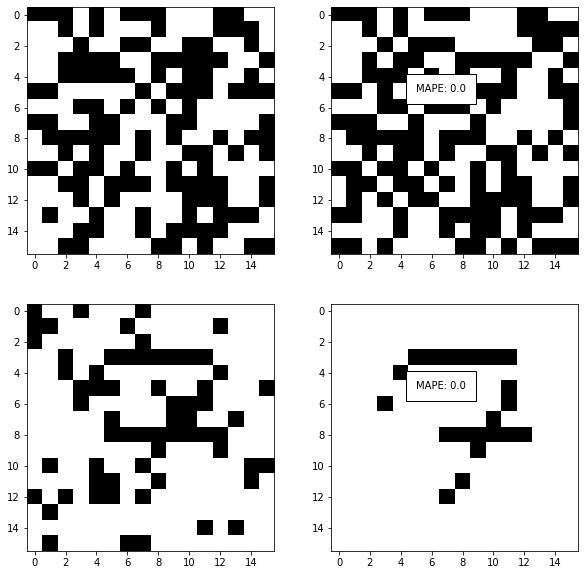

In [26]:
fig, axs = plt.subplots(test_im_num, 2, figsize=(10, 5*test_im_num))

for i, (image, true_image) in enumerate(zip(test_dataset, dataset)):
    pred_image = model.predict([image])
    mape = MAPE(pred_image, true_image)
    
    axs[i][0].imshow(np.array(image).reshape(image_size[0], image_size[0]), cmap='Greys_r')
    axs[i][1].imshow(np.array(pred_image).reshape(image_size[0], image_size[0]), cmap='Greys_r', )
    axs[i][1].text(5, 5, f'MAPE: {mape}', bbox={'facecolor': 'white', 'pad': 10})

plt.show()

Noise impact evalution
===

In [8]:
noises = [0, 0.5, 0.8, 0.9, 0.97, 0.98, 0.99, 1.]

true_image = dataset.__getitem__(3)

mapes = []

for i, (noise) in enumerate(noises):
    test_dataset = Dataset(list_of_paths=image_paths, image_size=image_size, add_noise=noise)
    image = test_dataset.__getitem__(0)
    
    pred_image = model.predict([image])
    mape = MAPE(pred_image, true_image)
    
    mapes.append(mape)
    
mapes

100%|██████████| 1/1 [00:00<00:00, 592.75it/s, Predicting...]


[0.97, 0.97, 0.97, 2.0, 1.09, 0.91, 0.91, 0.91]

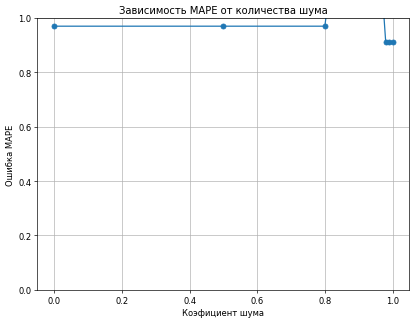

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=60)


ax.plot(noises, mapes,  marker='o')


ax.set_title('Зависимость MAPE от количества шума')
ax.set_xlabel('Коэфициент шума')
ax.set_ylabel('Ошибка MAPE')

plt.grid(True)
plt.ylim(0, 1)
plt.show()

model.weights.shape[0]Images count
===

In [10]:
#if model.weights.shape[0] < 5000:
use_restrictions = [5, 4, 3, 0] # [3, 2, 1, 0]
all_num = len(use_restrictions)

mapes1 = []
matricies = []

for i, (use_restriction) in tqdm(enumerate(use_restrictions), total=all_num):
    image_paths = glob.glob(pathname=image_path, recursive=True)
    image_paths = image_paths[:len(image_paths)-use_restriction]

    # Train data
    dataset = Dataset(list_of_paths=image_paths, image_size=image_size)
    flatten_images = dataset.get_all_flatten_images()

    # Test data
    test_dataset = Dataset(list_of_paths=image_paths, image_size=image_size, add_noise=0.3)

    model = HopfieldNetwork(train_data=flatten_images, verbose=False)
    model.train()

    mape_temp = []
    for i, (image, true_image) in enumerate(zip(test_dataset, dataset)):
        pred_image = model.predict([image])
        mape = MAPE(pred_image, true_image)
        mape_temp.append(mape)
    

    mapes1.append(np.array(mape_temp).mean())
    
    if model.weights.shape[0] < 5000:
        matricies.append(model.weights)

mapes1

100%|██████████| 4/4 [00:00<00:00, 21.51it/s]


[0.0, 0.0, 0.0, 0.2942857142857143]

In [11]:
7 - np.array(use_restrictions)

array([2, 3, 4, 7])

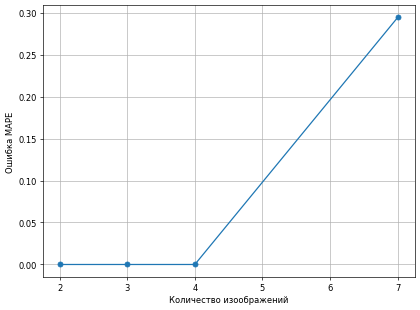

In [12]:
#if model.weights.shape[0] < 5000:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=60)


ax.plot(7 - np.array(use_restrictions), mapes1,  marker='o')


#ax.set_title('Зависимость MAPE от количества шума')
ax.set_xlabel('Количество изоображений')
ax.set_ylabel('Ошибка MAPE')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.grid(True)
plt.show()

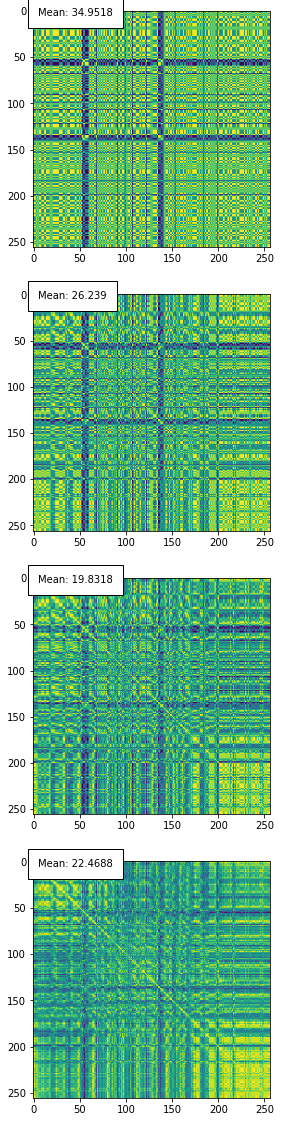

In [13]:
if model.weights.shape[0] < 5000:
    fig, axs = plt.subplots(all_num, 1, figsize=(10, 5*all_num))

    for i, matrix in enumerate(matricies):

        axs[i].text(5, 5, f'Mean: {round(matrix.mean()*100, 4)}', bbox={'facecolor': 'white', 'pad': 10})    
        axs[i].imshow(matrix)

    plt.show()

Weights heatmap
====model.weights

In [14]:
print(f'Heatmap size: {model.weights.shape}')

Heatmap size: (256, 256)


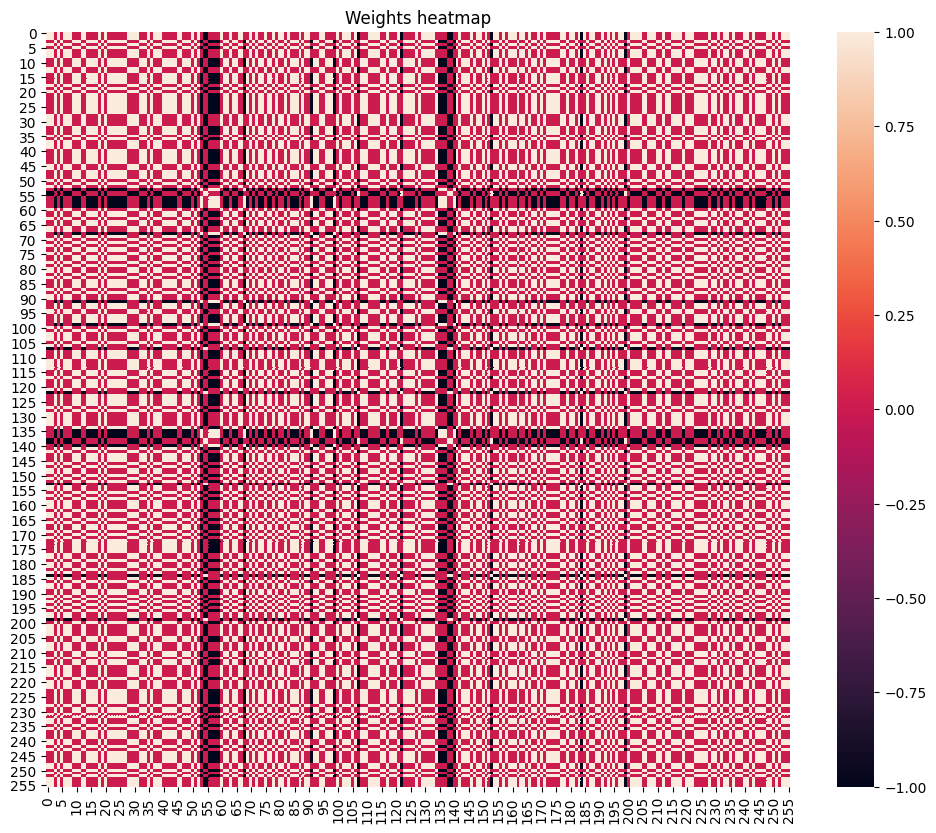

In [27]:
if model.weights.shape[0] < 5000:
    from matplotlib.pyplot import figure
    figure(figsize=(12, 10), dpi=100)
    plt.title(f'Weights heatmap')

    sns.heatmap(model.weights)
    plt.show()